### This notebook deals with the analysis of the post-study questionnaire responses.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [2]:
df = pd.read_csv('results.csv')

col_mapping = {
"easy_use": "roger was easy to use",
"understood": "roger understood me well",
"answers_useful": "rogers answers were useful",
"additional_info": "roger asked me for additional information when needed",
"explain_output": "roger was able to explain its own output when asked",
"robustness": "roger coped well with any mistakes I made when prompting it",
"workflow_improvement": "roger is an improvement to my workflow",
"generation_useful": "roger generates useful shell commands",
"efficiency": "roger improved my efficiency while using the terminal",
"response_time": "roger's response time was satisfactory",
"confidence": "I felt more confident with my terminal skills with roger's assistance",
"continue_using": "I would continue using roger for future terminal tasks",
}

In [3]:
# This function replaces the special strings with -1 in the dataframe
def replace_strings(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].apply(lambda x: int(x) if isinstance(x, str) and x.isnumeric() else -1)
    
    return df

In [4]:
# These columns contain numbers but also special case strings like "I did not make any mistakes"
specials_replaced = replace_strings(df, ["explain_output", "robustness"])

In [5]:
for col in specials_replaced.columns:
    if specials_replaced[col].dtype == 'float64' or specials_replaced[col].dtype == 'int64':
        filtered = specials_replaced.loc[specials_replaced[col] != -1]
        print(col)
        print(filtered[col].describe())
        print()

age
count    10.000000
mean     25.200000
std       2.616189
min      22.000000
25%      23.250000
50%      25.000000
75%      26.000000
max      31.000000
Name: age, dtype: float64

exp_years
count    10.000000
mean      3.700000
std       3.433495
min       1.000000
25%       1.000000
50%       1.500000
75%       6.750000
max      10.000000
Name: exp_years, dtype: float64

proficiency
count    10.000000
mean      2.200000
std       1.316561
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: proficiency, dtype: float64

easy_use
count    10.000000
mean      4.700000
std       0.483046
min       4.000000
25%       4.250000
50%       5.000000
75%       5.000000
max       5.000000
Name: easy_use, dtype: float64

understood
count    10.000000
mean      4.500000
std       0.527046
min       4.000000
25%       4.000000
50%       4.500000
75%       5.000000
max       5.000000
Name: understood, dtype: float64

answers_useful
count    10.000000

### Were users satisfied with roger?

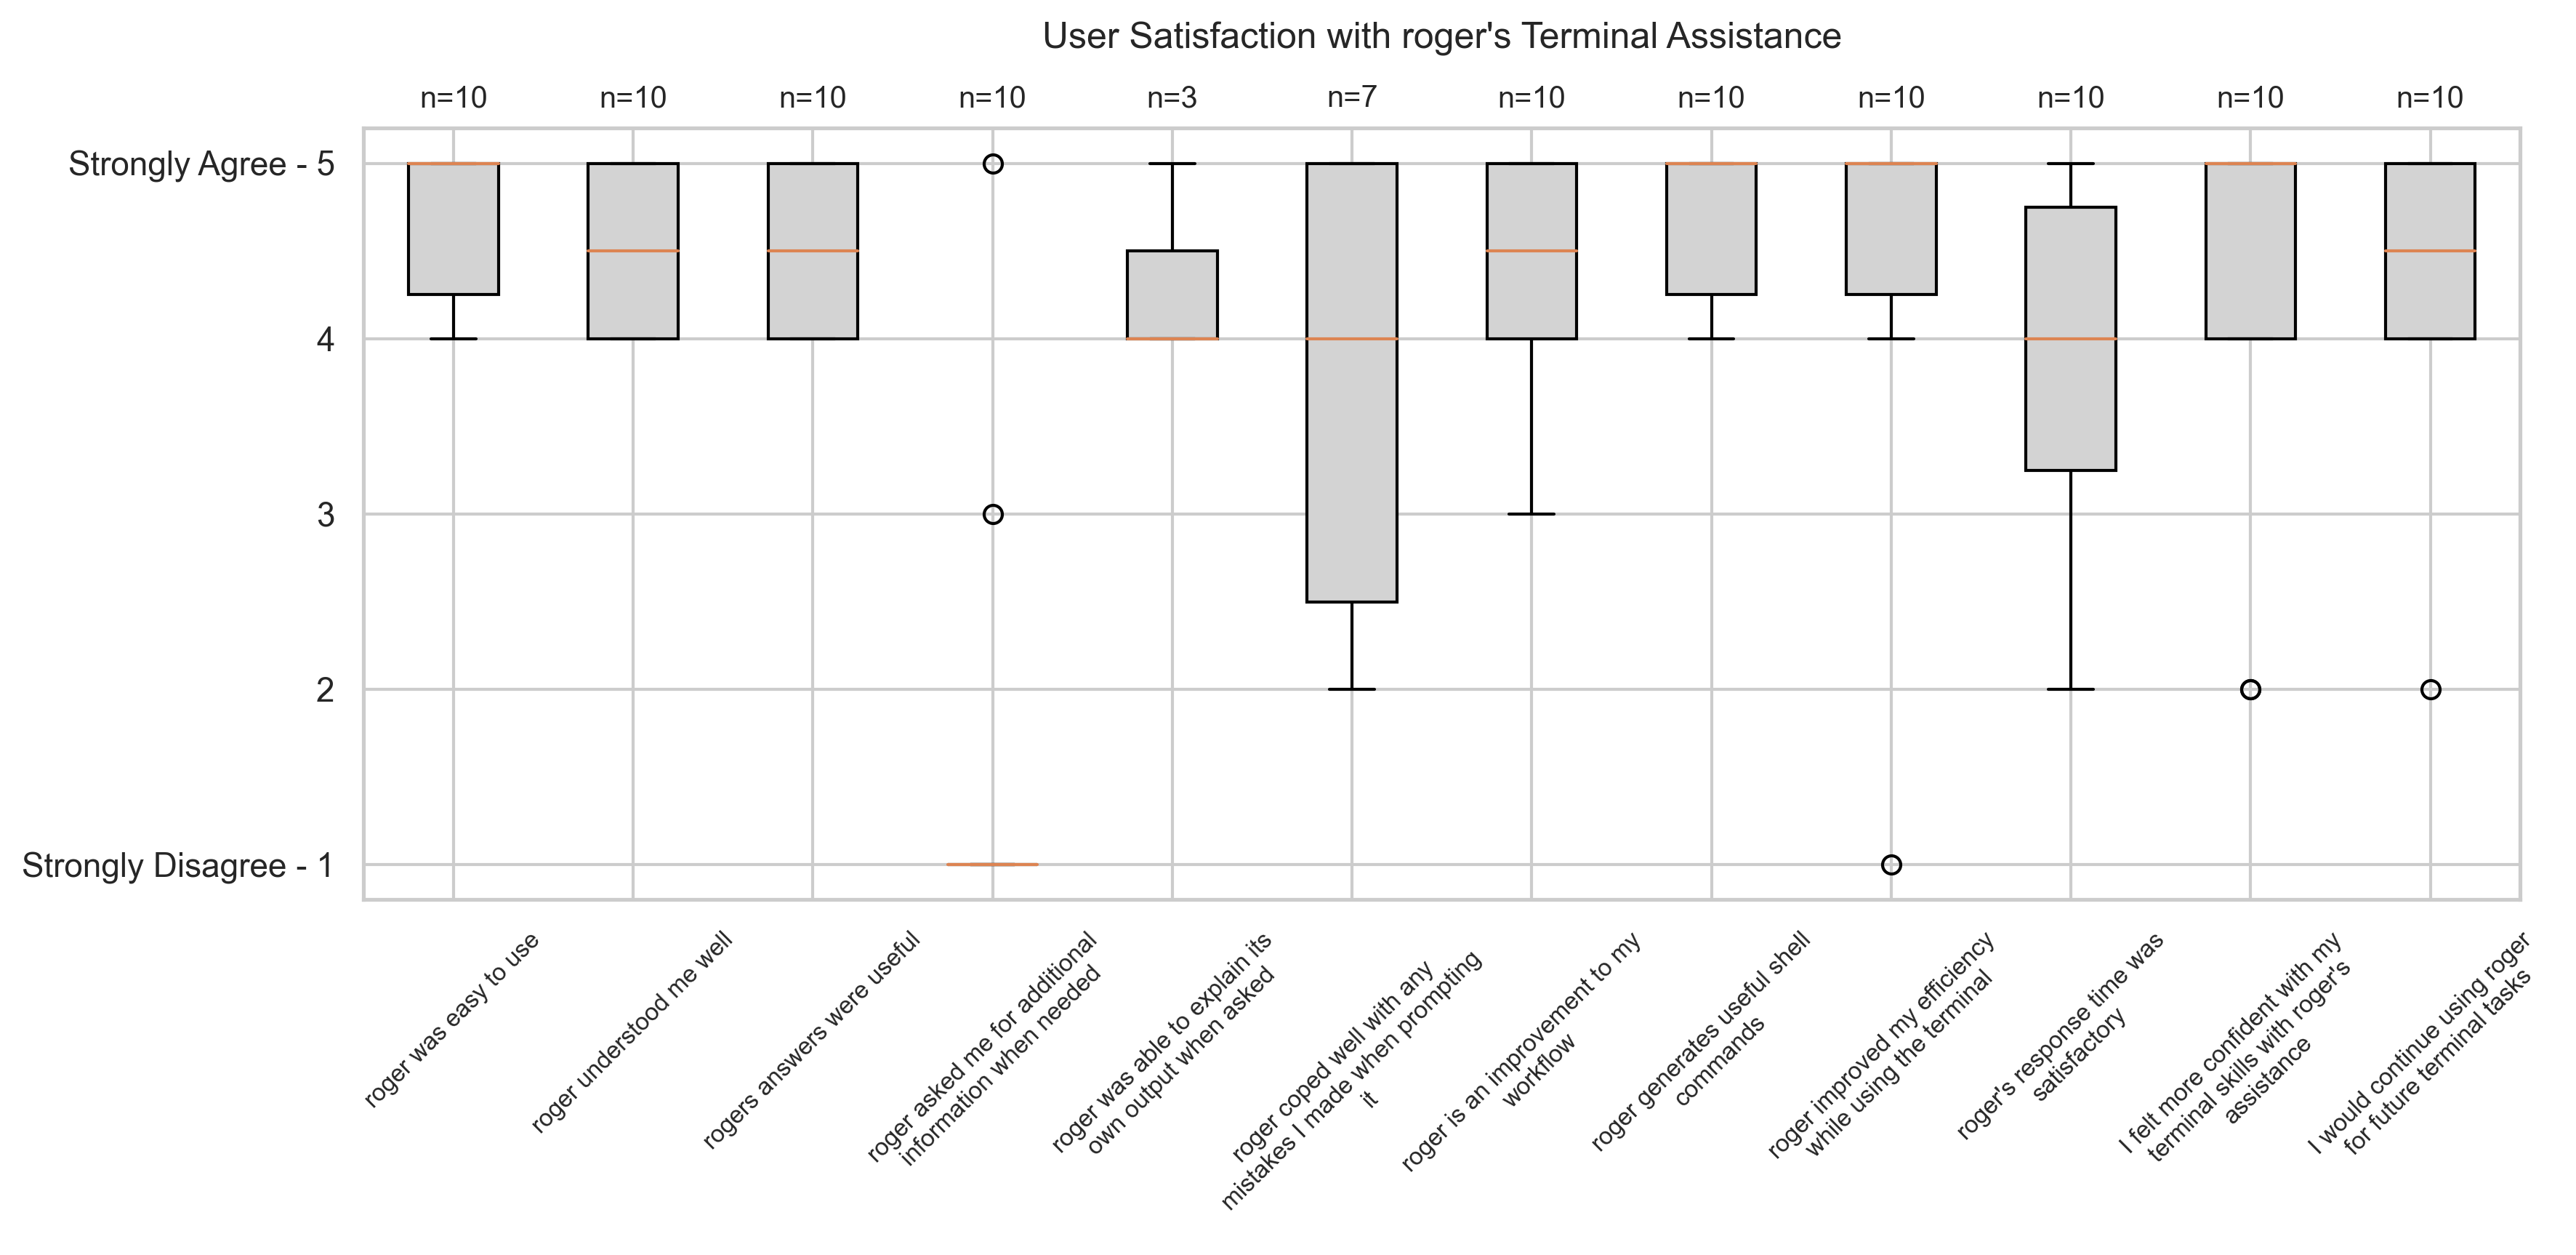

In [6]:
sns.set(style="whitegrid")

numeric_columns = [col for col in specials_replaced.columns if specials_replaced[col].dtype in ['float64', 'int64']]

filtered_data = []
labels = []
supports = []

for col in numeric_columns:
    if col != 'proficiency':
        filtered = specials_replaced.loc[specials_replaced[col] != -1]
        if filtered[col].min() >= 0 and filtered[col].max() <= 5:
            filtered_data.append(filtered[col])
            labels.append(col_mapping[col])
            supports.append(len(filtered))

fig, ax = plt.subplots(dpi=300, figsize = (12, 6))
box_plots = ax.boxplot(filtered_data, patch_artist=True)

# Set box color to gray
for box in box_plots['boxes']:
    box.set_facecolor('lightgray')

# Wrap the text for long statements
wrapped_labels = ['\n'.join(textwrap.wrap(label, 30)) for label in labels]
ax.set_xticklabels(wrapped_labels, rotation=45, fontsize=8)

# Add support labels at the top
for i, support in enumerate(supports):
    ax.text(i + 1, 1.02, f'n={support}', fontsize=10, ha='center', va='bottom', transform=ax.get_xaxis_transform())

# Set title with adjusted position
ax.set_title("User Satisfaction with roger's Terminal Assistance", y=1.08)

# Set custom Y-axis tick labels
ax.set_yticks(range(1, 6))
ax.set_yticklabels([
    'Strongly Disagree - 1',
    '2',
    '3',
    '4',
    'Strongly Agree - 5'
])

plt.tight_layout()
plt.show()

### Was there a difference in satisfaction/usefulness between self-proclaimed proficient and less proficient users?

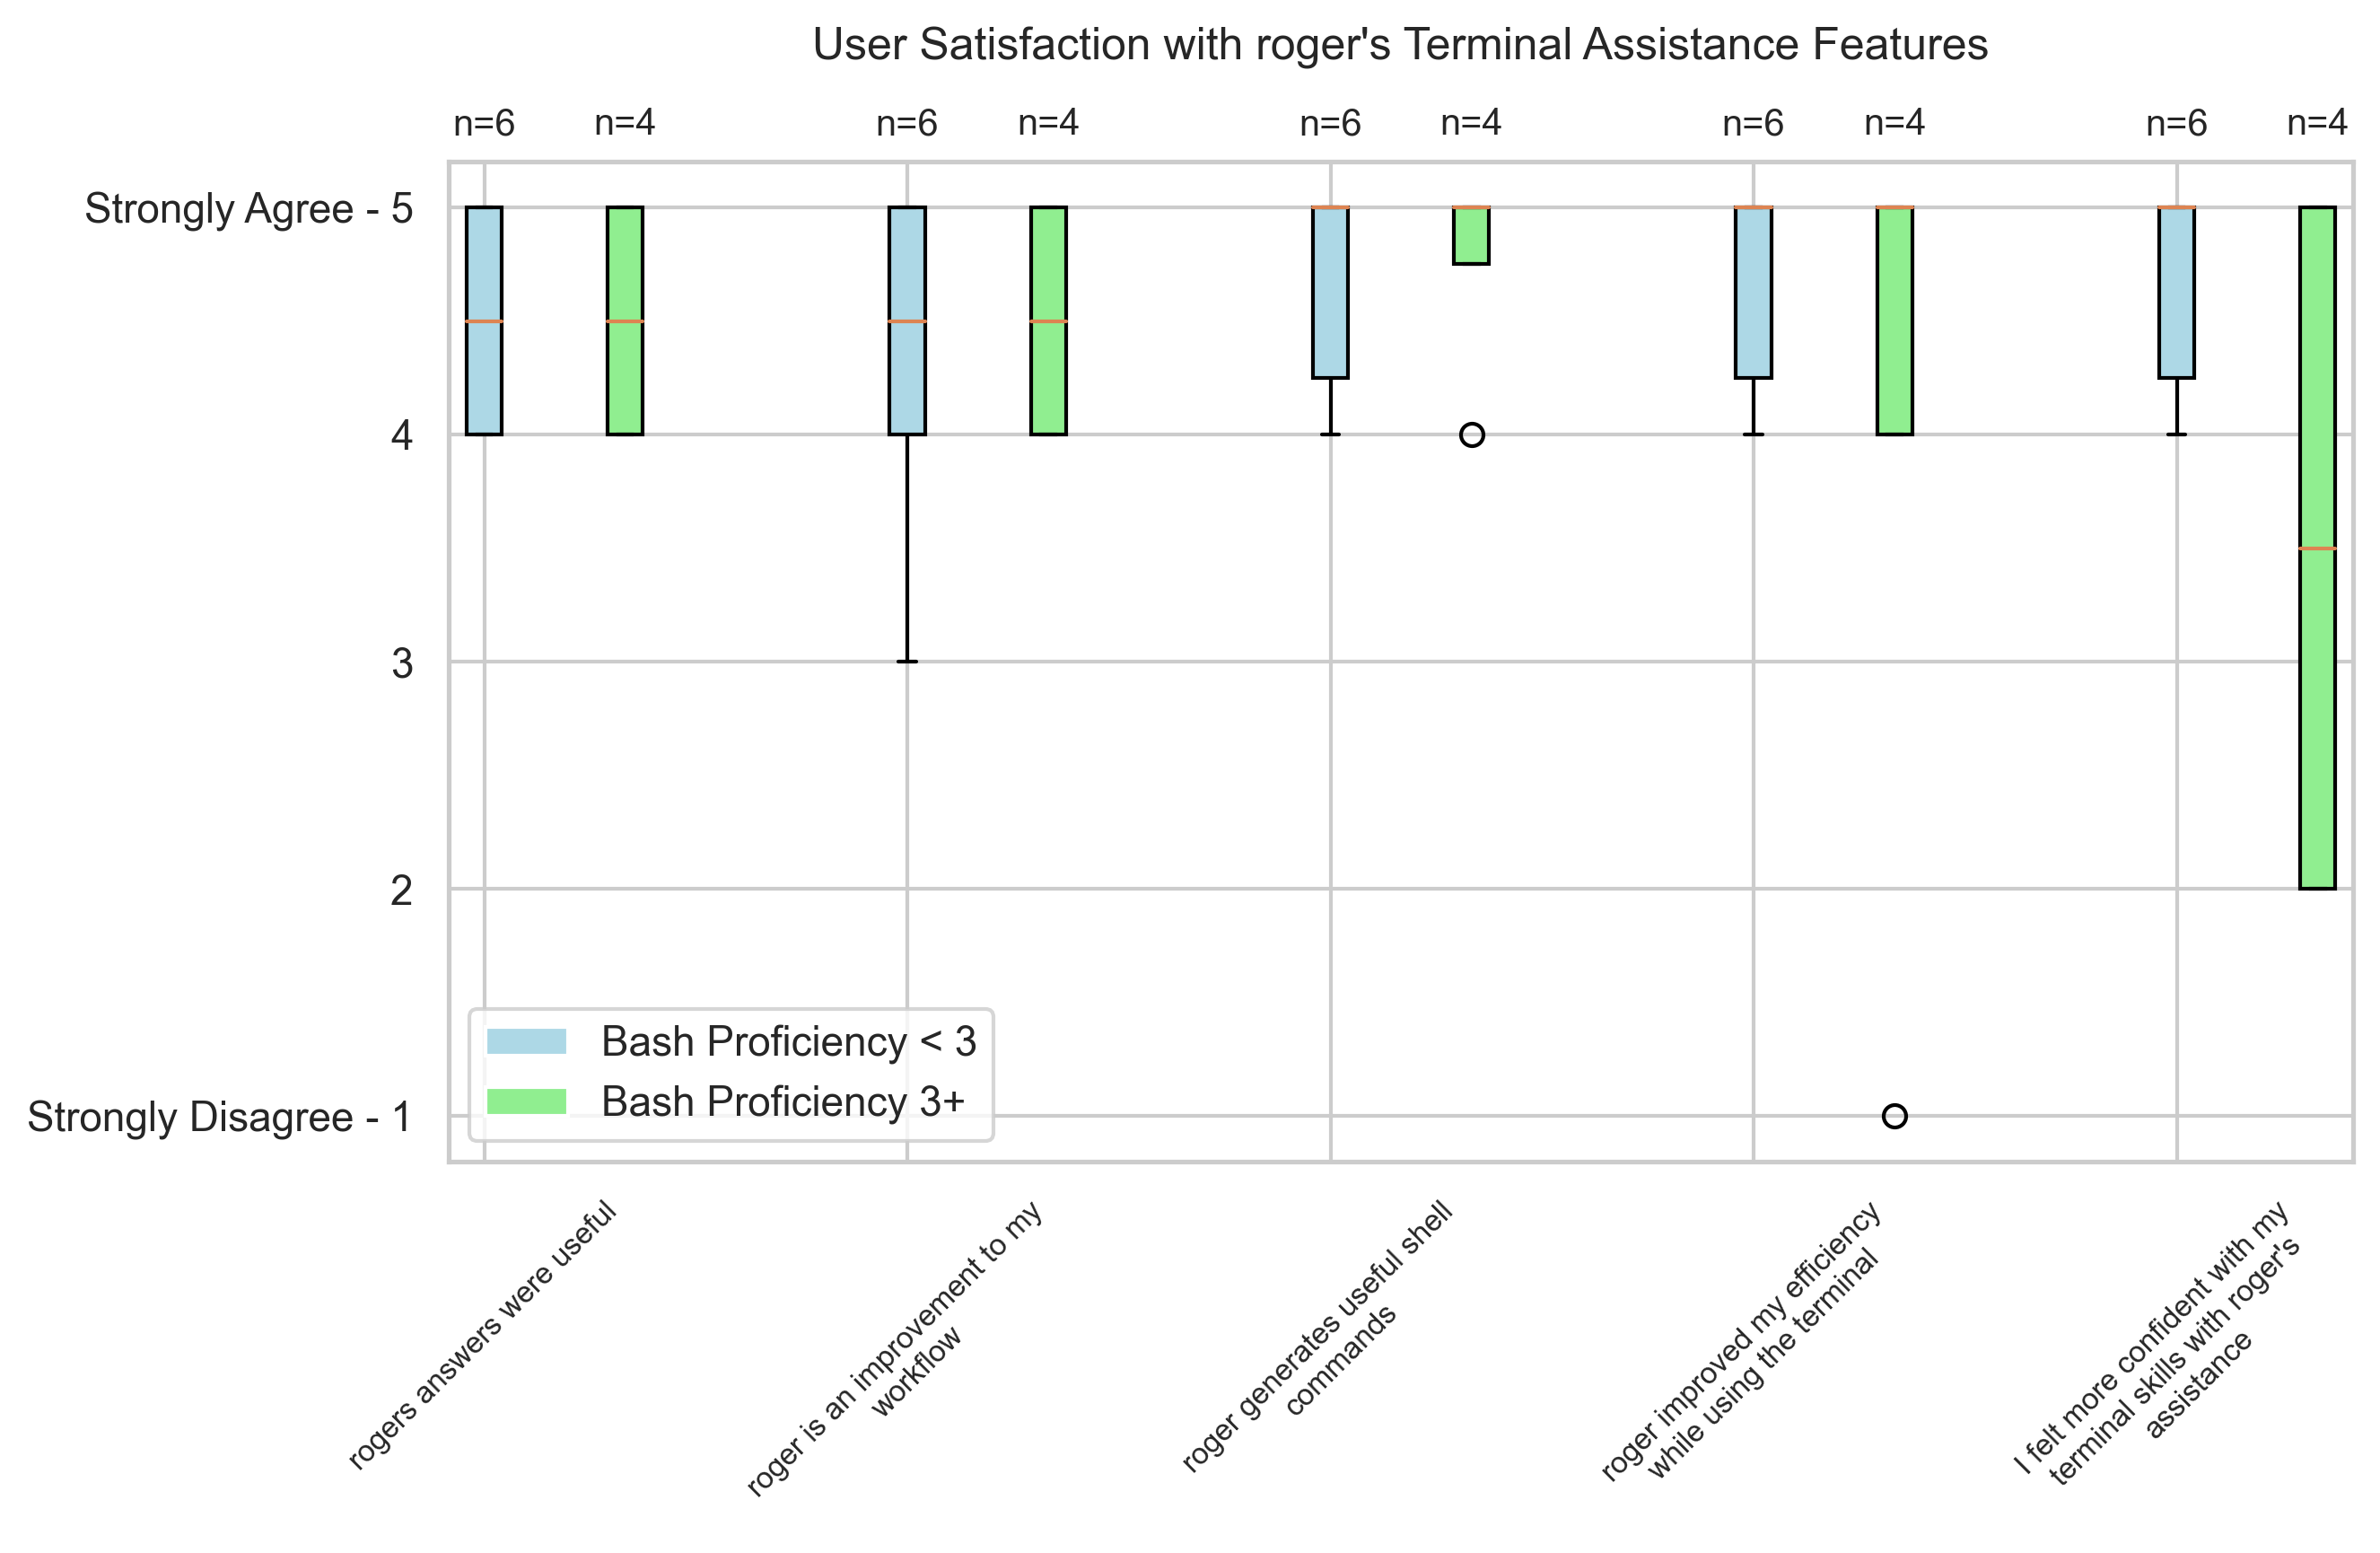

In [7]:
sns.set(style="whitegrid")

numeric_columns = [col for col in specials_replaced.columns if specials_replaced[col].dtype in ['float64', 'int64']]

# Split the data based on experience levels
inexperienced = specials_replaced[specials_replaced.proficiency < 3]
experienced = specials_replaced[specials_replaced.proficiency >= 3]

filtered_data = []
labels = []
supports = []

relevant_cols = {
"answers_useful": "rogers answers were useful",
"workflow_improvement": "roger is an improvement to my workflow",
"generation_useful": "roger generates useful shell commands",
"efficiency": "roger improved my efficiency while using the terminal",
"confidence": "I felt more confident with my terminal skills with roger's assistance",
}

for col in numeric_columns:
    if col in relevant_cols.keys():
        inexperienced_filtered = inexperienced.loc[inexperienced[col] != -1]
        experienced_filtered = experienced.loc[experienced[col] != -1]
        
        if inexperienced_filtered[col].min() >= 0 and inexperienced_filtered[col].max() <= 5:
            filtered_data.append(inexperienced_filtered[col])
            filtered_data.append(experienced_filtered[col])
            
            labels.append(col_mapping[col])
            labels.append('')
            
            supports.append(len(inexperienced_filtered))
            supports.append(len(experienced_filtered))

fig, ax = plt.subplots(dpi=300, figsize=(9, 6))

# Calculate positions for box plots
positions = []
for i in range(len(filtered_data)):
    positions.append(i * 2 + (i // 2) * 2)

box_plots = ax.boxplot(filtered_data, patch_artist=True, positions=positions)

colors = ['lightblue', 'lightgreen']

# Set box color for each class
for i, box in enumerate(box_plots['boxes']):
    box.set_facecolor(colors[i % 2])

# Set x-axis tick positions and labels
ax.set_xticks(positions[::2])
wrapped_labels = ['\n'.join(textwrap.wrap(label, 30)) for label in labels[::2]]
ax.set_xticklabels(wrapped_labels, rotation=45, fontsize=8)

# Add support labels at the top
for i, support in enumerate(supports):
    ax.text(positions[i], 1.02, f'n={support}', fontsize=10, ha='center', va='bottom', transform=ax.get_xaxis_transform())

# Set title with adjusted position
ax.set_title("User Satisfaction with roger's Terminal Assistance Features", y=1.08)

# Set custom Y-axis tick labels
ax.set_yticks(range(1, 6))
ax.set_yticklabels([
    'Strongly Disagree - 1',
    '2',
    '3',
    '4',
    'Strongly Agree - 5'
])

# Add a legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', label='Bash Proficiency < 3'),
    Patch(facecolor='lightgreen', label='Bash Proficiency 3+')
]
ax.legend(handles=legend_elements, loc='lower left')

plt.tight_layout()
plt.show()

### Was there a difference in satisfaction/usefulness between experience levels?

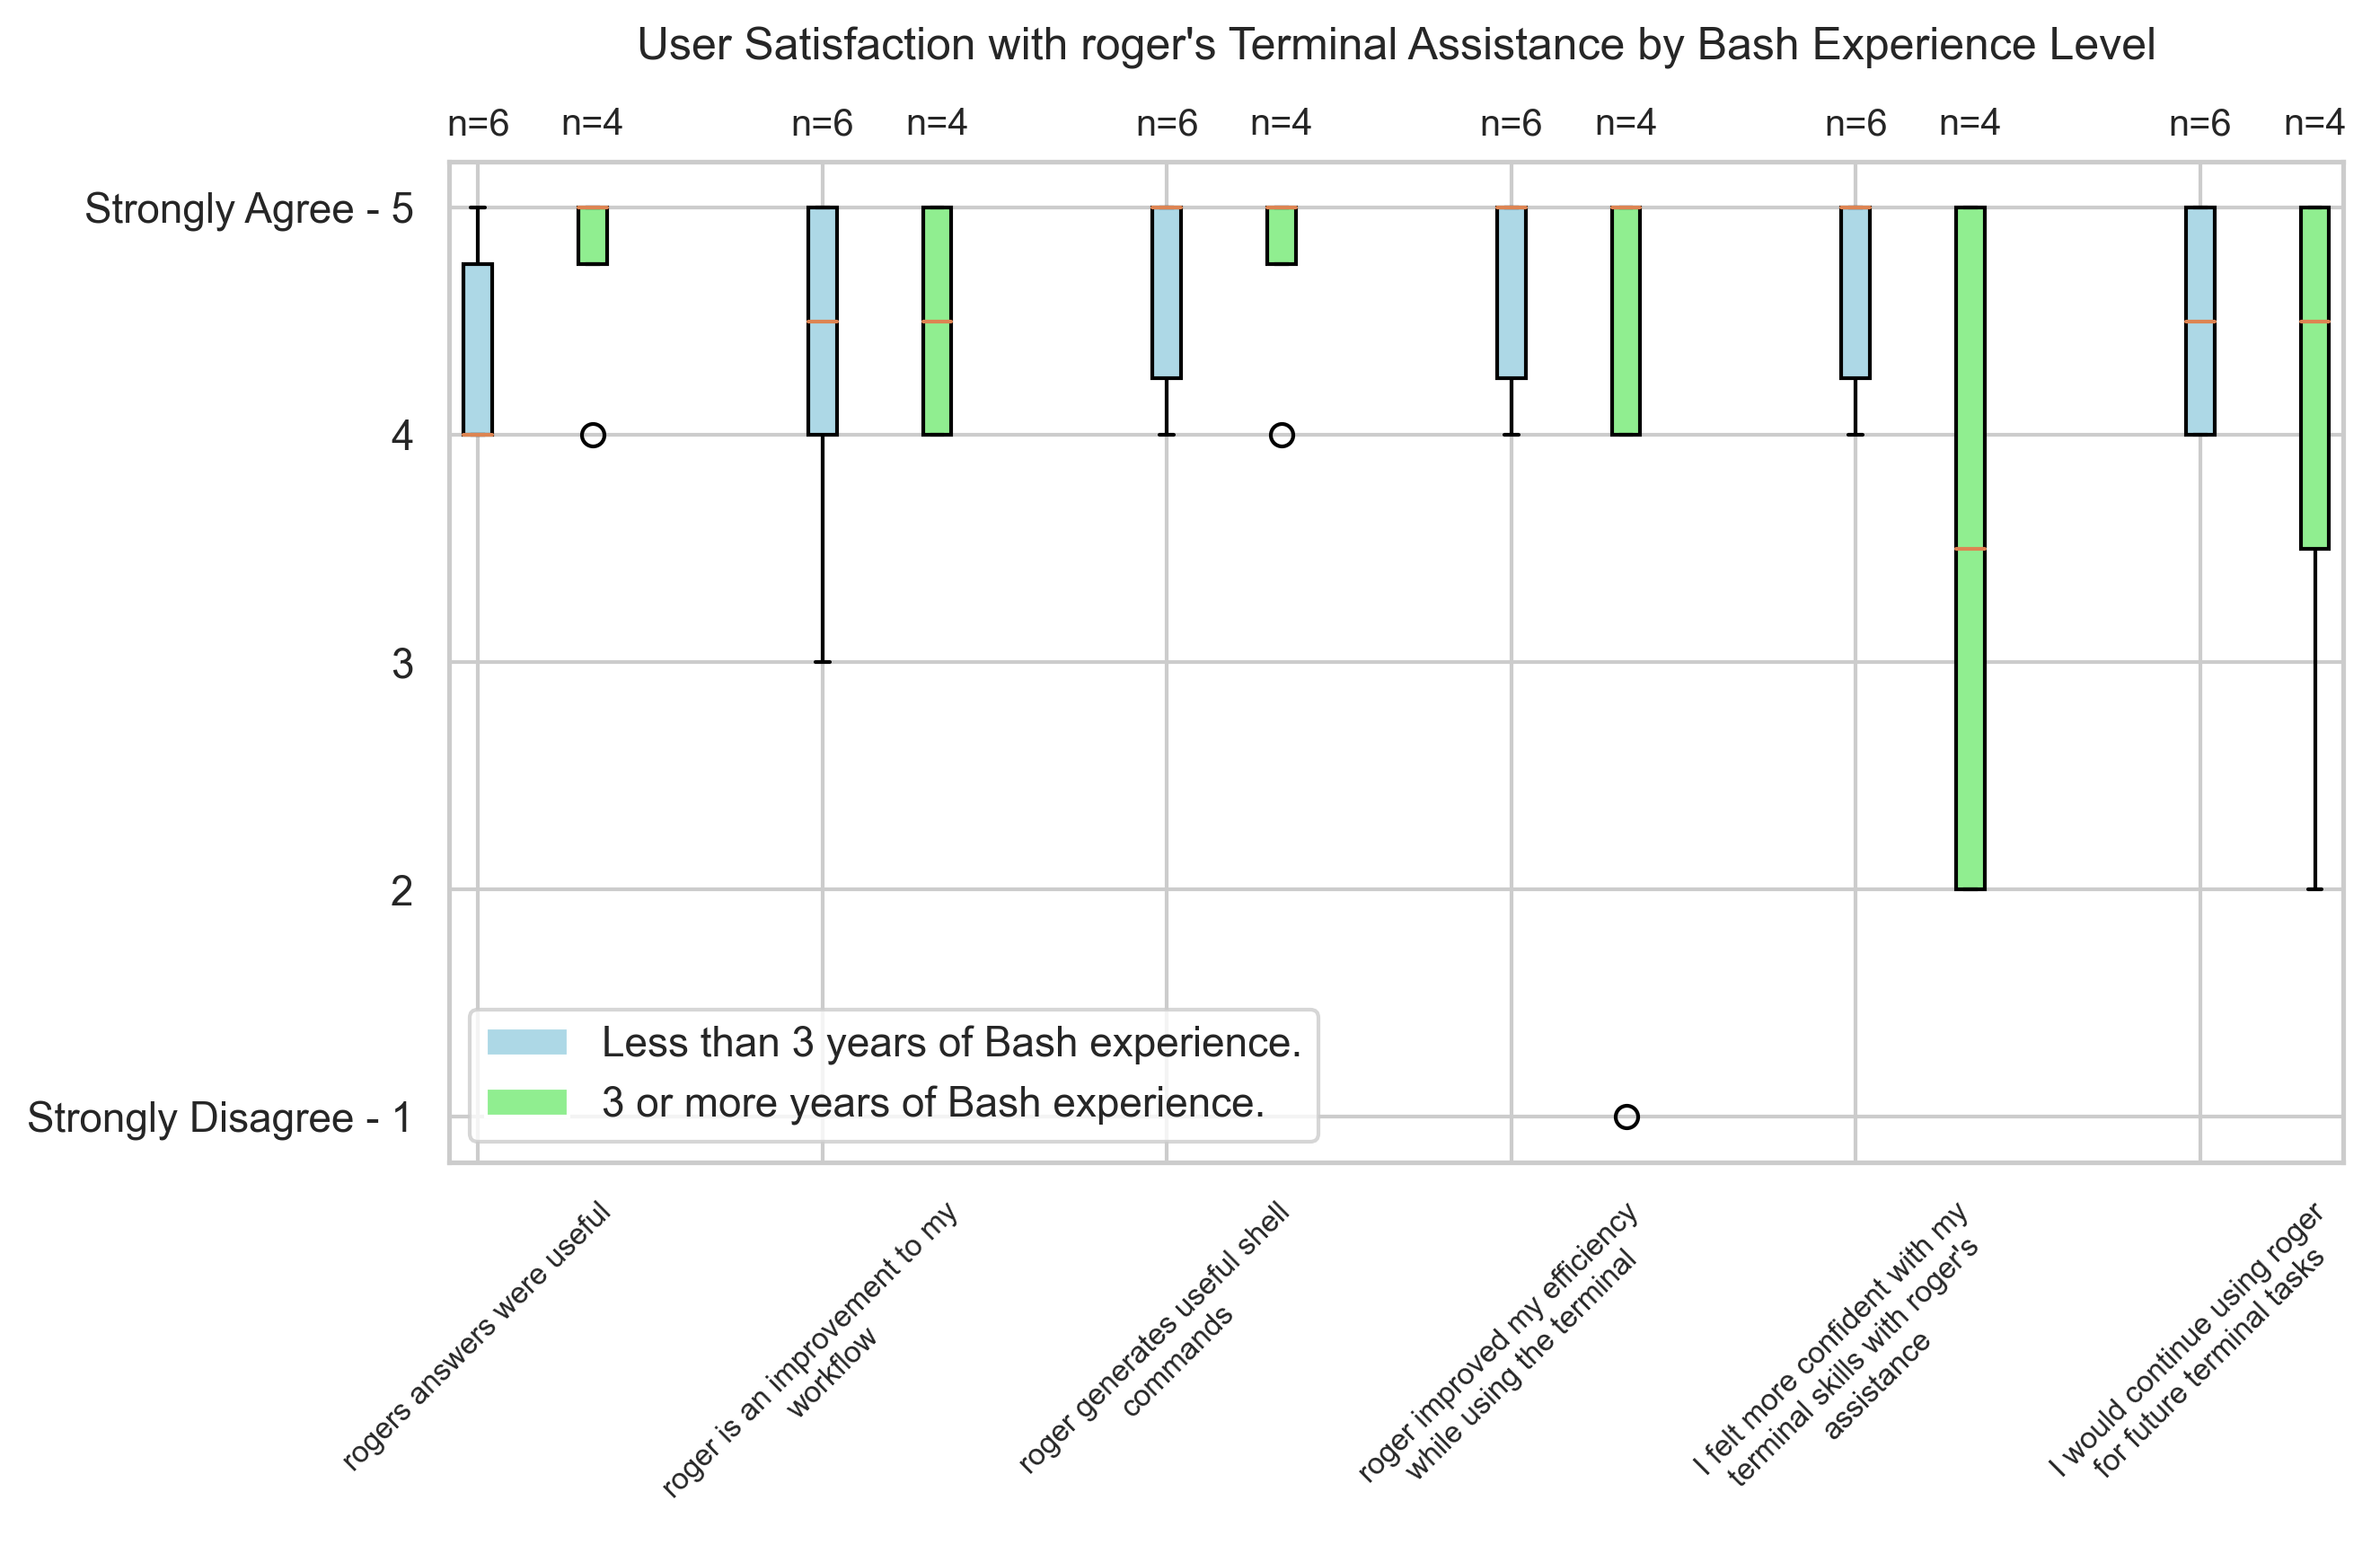

In [16]:
sns.set(style="whitegrid")

numeric_columns = [col for col in specials_replaced.columns if specials_replaced[col].dtype in ['float64', 'int64']]

# Split the data based on experience levels
inexperienced = specials_replaced[specials_replaced.exp_years <= 2]
experienced = specials_replaced[specials_replaced.exp_years > 2]

filtered_data = []
labels = []
supports = []

relevant_cols = {
"answers_useful": "rogers answers were useful",
"workflow_improvement": "roger is an improvement to my workflow",
"generation_useful": "roger generates useful shell commands",
"efficiency": "roger improved my efficiency while using the terminal",
"confidence": "I felt more confident with my terminal skills with roger's assistance",
"continue_using": "I would continue using roger for future terminal tasks",
}

for col in numeric_columns:
    if col in relevant_cols.keys():
        inexperienced_filtered = inexperienced.loc[inexperienced[col] != -1]
        experienced_filtered = experienced.loc[experienced[col] != -1]
        
        if inexperienced_filtered[col].min() >= 0 and inexperienced_filtered[col].max() <= 5:
            filtered_data.append(inexperienced_filtered[col])
            filtered_data.append(experienced_filtered[col])
            
            labels.append(col_mapping[col])
            labels.append('')
            
            supports.append(len(inexperienced_filtered))
            supports.append(len(experienced_filtered))

fig, ax = plt.subplots(dpi=300, figsize=(9, 6))

# Calculate positions for box plots
positions = []
for i in range(len(filtered_data)):
    positions.append(i * 2 + (i // 2) * 2)

box_plots = ax.boxplot(filtered_data, patch_artist=True, positions=positions)

colors = ['lightblue', 'lightgreen']

# Set box color for each class
for i, box in enumerate(box_plots['boxes']):
    box.set_facecolor(colors[i % 2])

# Set x-axis tick positions and labels
ax.set_xticks(positions[::2])
wrapped_labels = ['\n'.join(textwrap.wrap(label, 30)) for label in labels[::2]]
ax.set_xticklabels(wrapped_labels, rotation=45, fontsize=8)

# Add support labels at the top
for i, support in enumerate(supports):
    ax.text(positions[i], 1.02, f'n={support}', fontsize=10, ha='center', va='bottom', transform=ax.get_xaxis_transform())

# Set title with adjusted position
ax.set_title("User Satisfaction with roger's Terminal Assistance by Bash Experience Level", y=1.08)

# Set custom Y-axis tick labels
ax.set_yticks(range(1, 6))
ax.set_yticklabels([
    'Strongly Disagree - 1',
    '2',
    '3',
    '4',
    'Strongly Agree - 5'
])

# Add a legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', label="Less than 3 years of Bash experience."),
    Patch(facecolor='lightgreen', label='3 or more years of Bash experience.')
]
ax.legend(handles=legend_elements, loc='lower left')

plt.tight_layout()
plt.show()

In [9]:
df.learned_commands.value_counts()

True     8
False    2
Name: learned_commands, dtype: int64

In [10]:
df.uncertain_command.value_counts()

True     7
False    3
Name: uncertain_command, dtype: int64

In [11]:
df.explain_output.value_counts()

-1    7
 4    2
 5    1
Name: explain_output, dtype: int64

In [12]:
df.robustness.value_counts()

-1    3
 5    3
 2    2
 3    1
 4    1
Name: robustness, dtype: int64

In [20]:
df[df.exp_years < 3].confidence.describe()

count    6.000000
mean     4.666667
std      0.516398
min      4.000000
25%      4.250000
50%      5.000000
75%      5.000000
max      5.000000
Name: confidence, dtype: float64